In [ ]:
# Installing wget
!apt-get install wget
# Installing eagleSqlTools
!pip install eagleSqlTools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
wget is already the newest version (1.19.4-1ubuntu2.2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
# Libreries
import os                                                                       
import h5py                                                                     
import gc                                                                       
import numpy as np      
import matplotlib.pyplot as plt                                                      
import eagleSqlTools as eagle  
from TFG_code import *

# Dataset

In [ ]:
"""# Example storing the data

Example of how to use all the functions to obtain the dataset used in this 
thesis. It consists of four parts, the first one is optional:

The first (optional): Download the snapshots if they are not yet.

The second part stores the properties of the galaxies at snapshot 28 (z= 0). 

The third part stores the properties of both the formation region at 
snapshot 0 (z=20) and the overdensity found in this region. 

The fourth part stores the total angular momentum of this region. For this last 
part, we also want to show how it would be done in the case where the centre of
mass and radius data of the region to be studied are already stored in the file.
"""

"""	# load_snapshot function	"""

# Function to obtain the Snapshots of a EAGLE´s simulation.
def load_snapshot(simulation, snapnum):                                         
  print(snapnum)
  # input_text
  url = "'http://dataweb.cosma.dur.ac.uk:8080/eagle-snapshots//download?run=%s&snapnum=%i'"%(simulation, snapnum)
  
  # extension final del path tar
  if len(str(snapnum)) == 1:          
    tar = "%s_snap_00%i.tar"%(simulation, snapnum)
  elif len(str(snapnum)) == 2: 
    tar = "%s_snap_0%i.tar"%(simulation, snapnum)
  else:
    tar = "%s_snap_%i.tar"%(simulation, snapnum)

  # path del tar
  path = "/content/%s"%(tar)

  # Download
  !wget --user=wvd747 --password=CGQ269nm --content-disposition {url}
  # Discompression
  !tar -xf {path}
  # Remove tar file
  !rm -R {tar}

# List of EAGLE´s simulations.
list_sim = ["RefL0012N0188", "RefL0025N0376",
	          "RefL0050N0752", "RecalL0025N0752"]                                       

# Simulation selected	
sim = list_sim[0]	

# Snapshots 0 and 28
for i in [0, 28]:
  load_snapshot(simulation=sim, snapnum=i) 

# Load Snapshots
snap_0  = Data_snapnum(simulation=sim, snapnum=0,                        
                      path='%s/snapshot_000_z020p000'%(sim),
                      user_name="wvd747", password="CGQ269nm")
        	        
snap_28 = Data_snapnum(simulation=sim, snapnum=28, 
                      path='%s/snapshot_028_z000p000'%(sim),
                      user_name="wvd747", password="CGQ269nm")                    

n_galaxies = len(snap_28.catalogue)
print("%s: %s disc massive galaxies: "%(sim, n_galaxies))

# Creation of the h5 file for all the information needed
h5f = h5py.File('TFG_%s.h5'%(sim), 'a')				  
 # Creation/use of the simulation part of the .h5py dataset                                
try:									                                                         
  IDf = h5f.create_dataset(sim, data=snap_28.catalogue['GalaxyID'])
except:
  IDf = h5f['%s'%(sim)]

# First Part
IDf.attrs['Mass']       = snap_28.catalogue['Mass']
IDf.attrs['MassStar']   = snap_28.catalogue['MassType_Star']
IDf.attrs['Vmax']       = snap_28.catalogue['Vmax']
IDf.attrs['GasSpin_z']  = snap_28.catalogue['GasSpin_z']
IDf.attrs['KappaCoRot'] = snap_28.catalogue['KappaCoRot']

print("Save 1st Info  --> Done")

# Second part
radio       = np.zeros(n_galaxies, dtype= np.dtype('<f8'))
mass_center = np.zeros((n_galaxies, 3), dtype= np.dtype('<f8'))
Mass        = np.zeros(n_galaxies, dtype= np.dtype('<f8'))
rho         = np.zeros(n_galaxies, dtype= np.dtype('<f8'))
overrho     = np.zeros(n_galaxies, dtype= np.dtype('<f8'))

for i in range(n_galaxies):						                                          
  radio[i], mass_center[i]    = Galaxy_to_past(GalaxyID = snap_28.catalogue['GalaxyID'][i], 
		                                           snap_1   = snap_28, snap_2 = snap_0) 
  overrho[i], rho[i], Mass[i] = Overrho(snap   = snap_0, 
                                        Radio  = radio[i], 
                                        center = mass_center[i])              

IDf.attrs['radio_sphere']   = radio
IDf.attrs['center_mass']    = mass_center
IDf.attrs['Snap_0_mass']    = Mass
IDf.attrs['Snap_0_rho']     = rho
IDf.attrs['Snap_0_overrho'] = overrho

print("Save 2nd Info  --> Done")

# Third part
atrib = lambda att: IDf.attrs.get(att)
angular = np.zeros((n_galaxies,3), dtype= np.dtype('<f8'))

for i in range(n_galaxies):
  angular[i] = AngularMoment(snap = snap_0,
                             Radio = atrib('radio_sphere')[i],
                             center = atrib('center_mass')[i])

IDf.attrs['Snap_0_angular'] = angular
print("Save 3rd Info  --> Done")

h5f.close()

print('\n Finised. ')

0
--2021-07-22 10:52:37--  http://dataweb.cosma.dur.ac.uk:8080/eagle-snapshots//download?run=RefL0012N0188&snapnum=0
Resolving dataweb.cosma.dur.ac.uk (dataweb.cosma.dur.ac.uk)... 193.60.196.24
Connecting to dataweb.cosma.dur.ac.uk (dataweb.cosma.dur.ac.uk)|193.60.196.24|:8080... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Eagle Database Authentication"
Reusing existing connection to dataweb.cosma.dur.ac.uk:8080.
HTTP request sent, awaiting response... 200 OK
Length: 565872640 (540M) [application/octet-stream]
Saving to: ‘RefL0012N0188_snap_000.tar’

RefL0012N0188_snap_ 100%[===================>] 539.66M  28.7MB/s    in 20s     

2021-07-22 10:52:59 (27.1 MB/s) - ‘RefL0012N0188_snap_000.tar’ saved [565872640/565872640]

28
--2021-07-22 10:53:01--  http://dataweb.cosma.dur.ac.uk:8080/eagle-snapshots//download?run=RefL0012N0188&snapnum=28
Resolving dataweb.cosma.dur.ac.uk (dataweb.cosma.dur.ac.uk)... 193.60.196.24
Connecting t

# Visualization

In [ ]:
f    =  h5py.File('TFG_%s.h5'%(sim), 'r')
simf = f['%s'%(sim)]
simf.attrs.keys()

<KeysViewHDF5 ['GasSpin_z', 'KappaCoRot', 'Mass', 'MassStar', 'Snap_0_angular', 'Snap_0_mass', 'Snap_0_overrho', 'Snap_0_rho', 'Vmax', 'center_mass', 'radio_sphere']>

In [ ]:
atrib = lambda att: f['%s'%(sim)].attrs.get(att)

## Overdensity

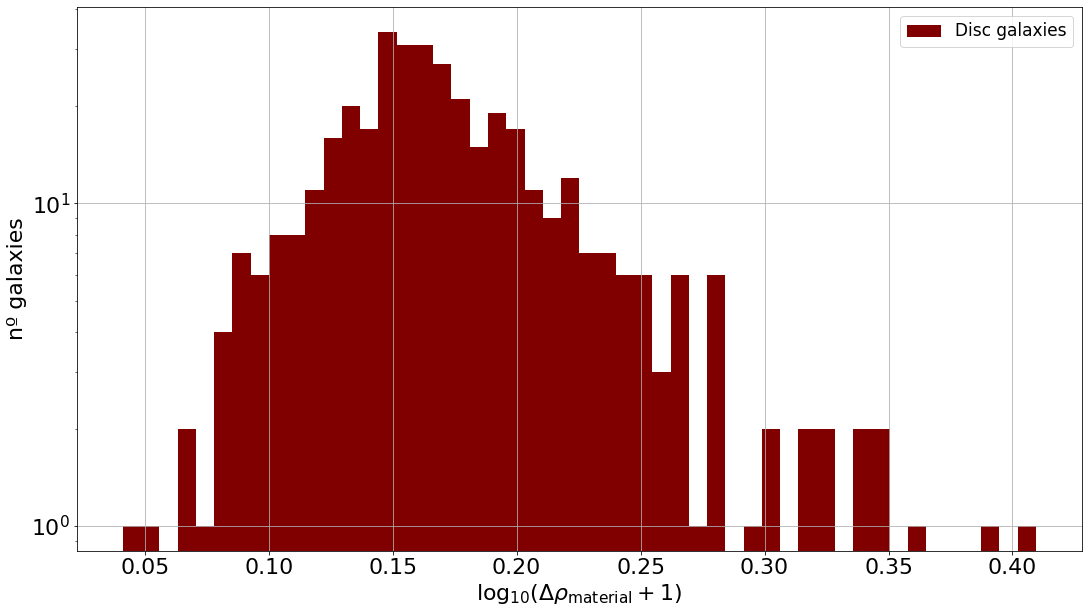

In [ ]:
fig_hist_all= plt.figure(figsize=(18,10))
ax_hist     = fig_hist_all.add_subplot(111)
plt.rcParams['font.size'] = '22'

# Data
ax_hist.hist(np.log(atrib('Snap_0_overrho')+1), bins=50, color= 'maroon', label='Disc galaxies')

#label
ax_hist.set_xlabel(r'$\log_{10}(\Delta\rho_{\mathrm{material}}+1)$', fontsize=22)
ax_hist.set_ylabel(r'nº galaxies', fontsize=22)
ax_hist.legend(fontsize=17)
ax_hist.grid()
ax_hist.set_yscale('log')


plt.show()

## Overdensity vs Vmax vs Rs

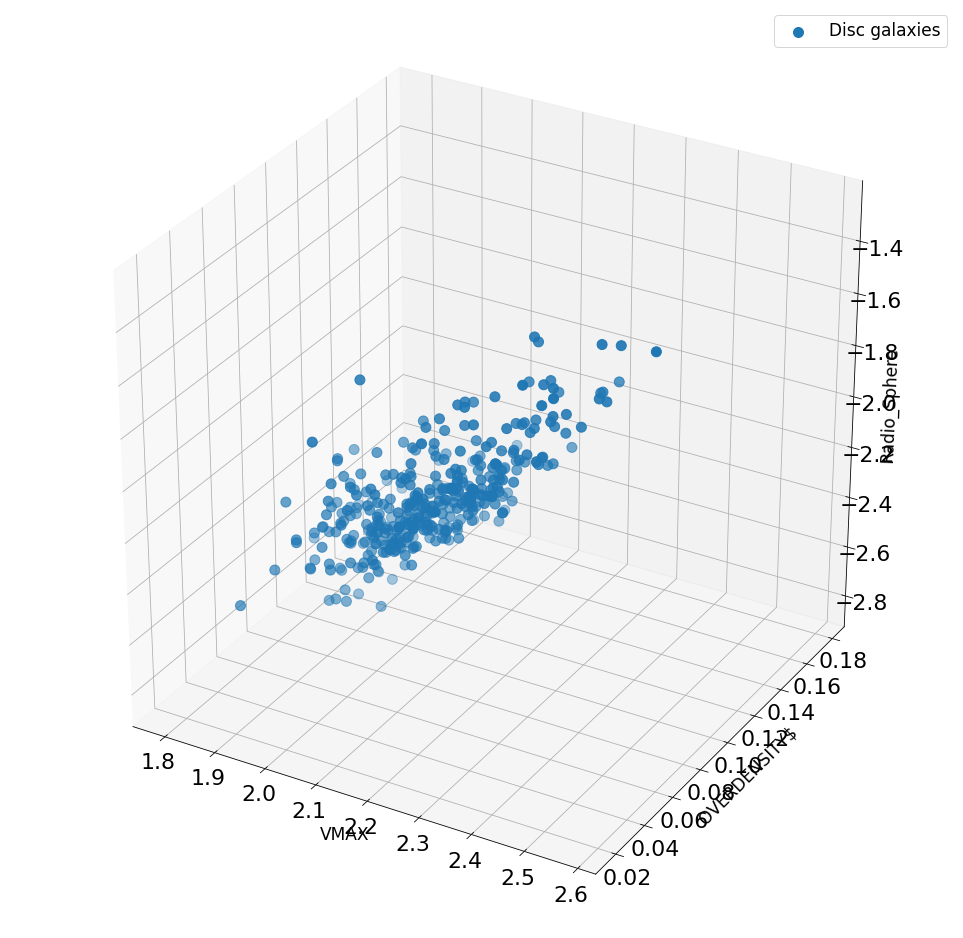

In [ ]:
fig = plt.figure(figsize=(17,17))
ax = fig.gca(projection='3d')

color = ['darkorange', 'teal', 'grey', 'k']
alpha = [1, 1, 1, 1]

ax.scatter(xs= np.log10(atrib('Vmax')), 
           ys= np.log10(atrib('Snap_0_overrho')+1), 
           zs= np.log10(atrib('radio_sphere')), 
           s= 1e2, label='Disc galaxies')

ax.set_xlabel(r'VMAX', size=17)
ax.set_ylabel(r'OVERDENSITY$', size=17)
ax.set_zlabel(r'Radio_Sphere', size=17)

plt.legend(prop={'size': 17})
plt.show()

## Vmax vs Rs and Ms

[ 0.89237019 -2.96640017]
[ 2.62438421 -3.5327875 ]


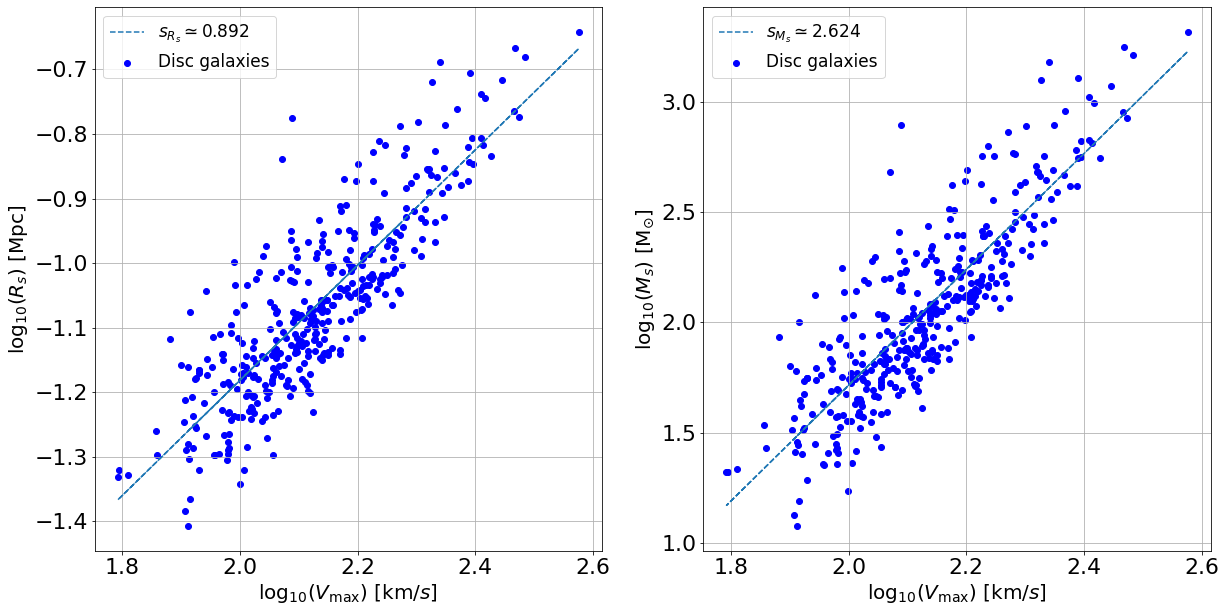

In [ ]:
fig_hist_all= plt.figure(figsize=(20,10))

ax     = fig_hist_all.add_subplot(121)

fit = np.polyfit(np.log10(atrib('Vmax')), np.log10(np.sqrt(atrib('radio_sphere'))), 1)

# Data
ax.scatter(np.log10(atrib('Vmax')), np.log10(np.sqrt(atrib('radio_sphere'))), 
           color= 'blue', label='Disc galaxies')

ax.plot(np.log10(atrib('Vmax')), np.log10(atrib('Vmax'))*fit[0] + fit[1], '--', label= r'$s_{R_{s}} \simeq $' + str(fit[0])[0:5])

print(fit)

#label
ax.set_xlabel(r'$\log_{10}(V_{\mathrm{max}})$ $[\mathrm{km}/s]$', fontsize=20)
ax.set_ylabel(r'$\log_{10}(R_{s})$ $[\mathrm{Mpc}]$', fontsize=20)
ax.legend(fontsize=17)
ax.grid()

ax     = fig_hist_all.add_subplot(122)

fit = np.polyfit(np.log10(atrib('Vmax')), np.log10(atrib('Snap_0_mass')), 1)

# Data
ax.scatter(np.log10(atrib('Vmax')), np.log10(atrib('Snap_0_mass')), 
           color= 'blue', label='Disc galaxies')

ax.plot(np.log10(atrib('Vmax')), np.log10(atrib('Vmax'))*fit[0] + fit[1], '--', label= r'$s_{M_{s}} \simeq $' + str(fit[0])[0:5])

print(fit)

#label
ax.set_xlabel(r'$\log_{10}(V_{\mathrm{max}})$ $[\mathrm{km}/s]$', fontsize=20)
ax.set_ylabel(r'$\log_{10}(M_{s})$ $[\mathrm{M}_{\odot}]$', fontsize=20)
ax.legend(fontsize=17)
ax.grid()


plt.show()

## Ms vs Rs

[ 0.34227357 -1.76973811]


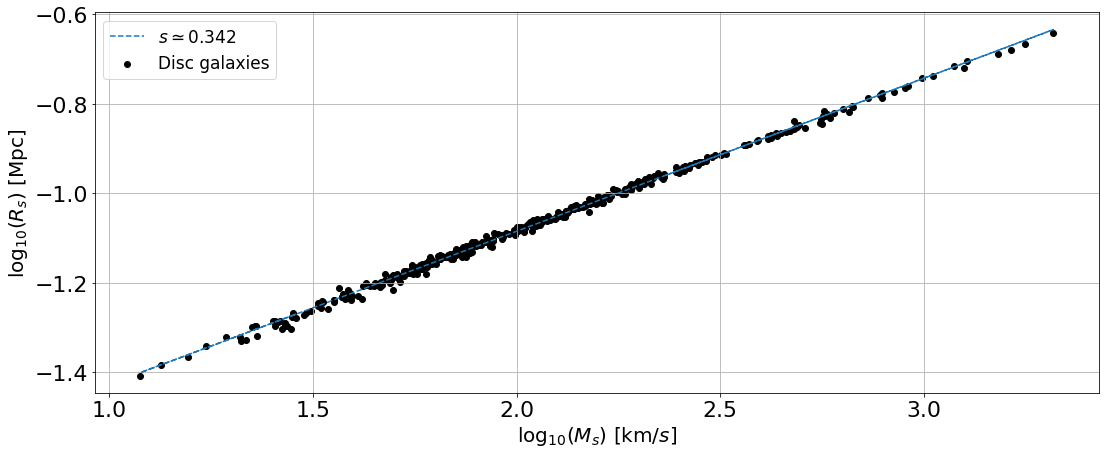

In [ ]:
fig_hist_all= plt.figure(figsize=(18,7))

ax     = fig_hist_all.add_subplot(111)

fit = np.polyfit(np.log10(atrib('Snap_0_mass')), np.log10(np.sqrt(atrib('radio_sphere'))), 1)

# Data
ax.scatter(np.log10(atrib('Snap_0_mass')), np.log10(np.sqrt(atrib('radio_sphere'))), 
           color= 'black', label='Disc galaxies')

ax.plot(np.log10(atrib('Snap_0_mass')), np.log10(atrib('Snap_0_mass'))*fit[0] + fit[1], '--', label= r'$s \simeq $' + str(fit[0])[0:5])

print(fit)

#label
ax.set_xlabel(r'$\log_{10}(M_{s})$ $[\mathrm{km}/s]$', fontsize=20)
ax.set_ylabel(r'$\log_{10}(R_{s})$ $[\mathrm{Mpc}]$', fontsize=20)
ax.legend(fontsize=17)
ax.grid()

## Module Total Angular Momentum

In [ ]:
abs_angular = np.sqrt(np.sum(atrib('Snap_0_angular')**2, axis= 1))

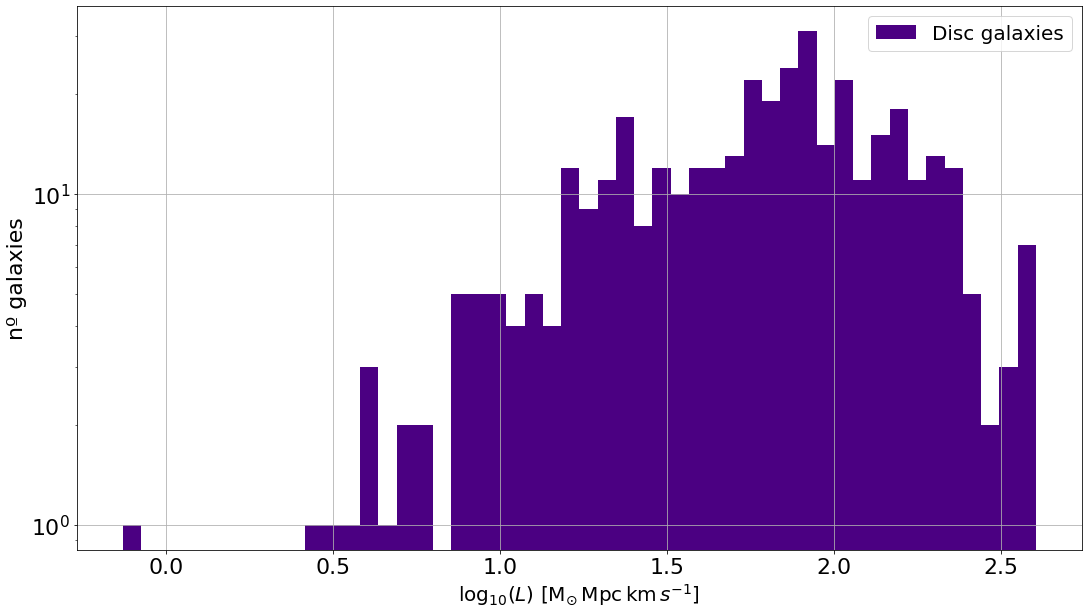

In [ ]:
fig_hist_all= plt.figure(figsize=(18,10))
ax_hist     = fig_hist_all.add_subplot(111)
plt.rcParams['font.size'] = '22'

# Data
ax_hist.hist(np.log10(abs_angular), bins=50, color= 'indigo', label='Disc galaxies')

#label
ax_hist.set_xlabel(r'$\log_{10}(L)$ $[\mathrm{M}_{\odot}\, \mathrm{Mpc}\, \mathrm{km}\, s^{-1}]$', fontsize=20)
ax_hist.set_ylabel(r'nº galaxies', fontsize=22)
ax_hist.legend(fontsize=20)
ax_hist.grid()
ax_hist.set_yscale('log')


plt.show()

## Angular Momentum vs Overdensity vs Vmax

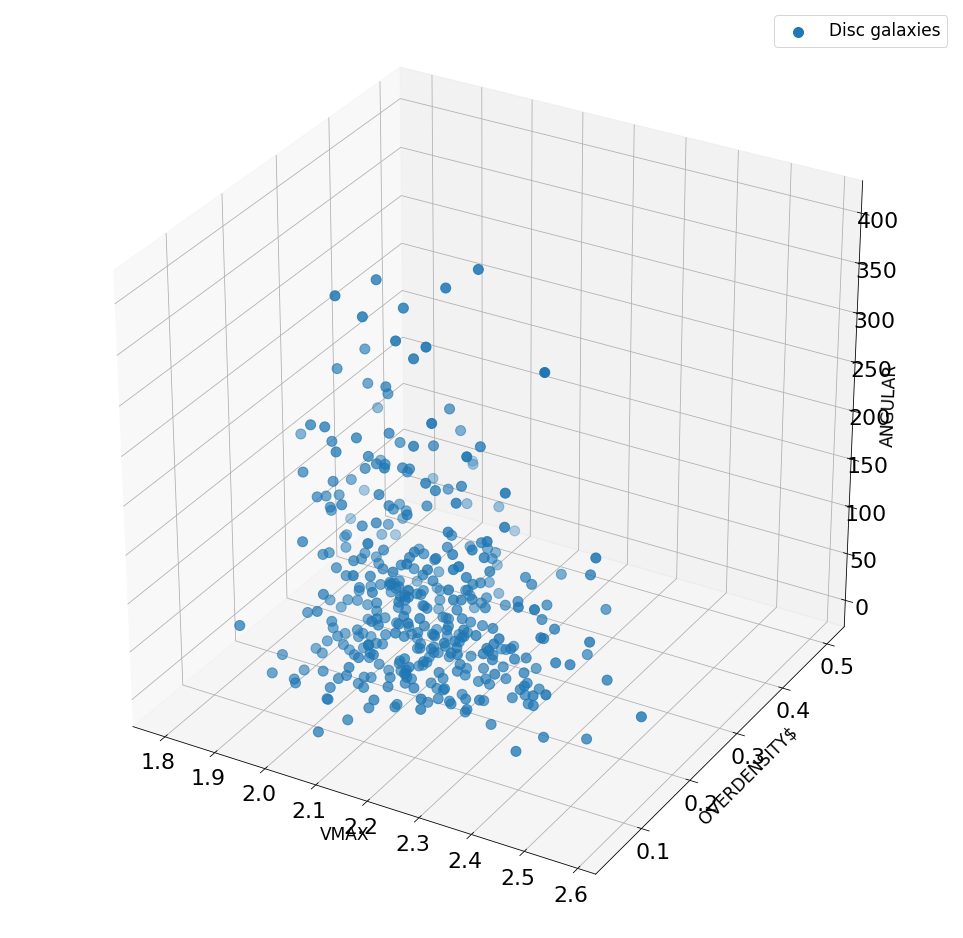

In [ ]:
fig = plt.figure(figsize=(17,17))
ax = fig.gca(projection='3d')

color = ['darkorange', 'teal', 'grey', 'k']
alpha = [1, 1, 1, 1]

ax.scatter(xs= np.log10(atrib('Vmax'))[:len(abs_angular)], 
           ys= atrib('Snap_0_overrho')[:len(abs_angular)], 
           zs= abs_angular, 
           s= 1e2, label='Disc galaxies')

ax.set_xlabel(r'VMAX', size=17)
ax.set_ylabel(r'OVERDENSITY$', size=17)
ax.set_zlabel(r'ANGULAR', size=17)

plt.legend(prop={'size': 17})
#ax.view_init(elev=90, azim=0)
plt.show()